# Buy Bitcoin Strategy

In [15]:
import pandas as pd
from openbb import obb
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
load_dotenv()
# Docs de OpenBB https://docs.openbb.co/platform/reference/crypto/price/historical

True

In [14]:
!pip install openbb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 16.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.1/268.1 kB 2.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 1.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 1.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 1.4 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 501.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 882.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 1.4 MB/s eta 0:00:00:00:01
  Using cached html5lib-1.1-

In [16]:
obb.user.credentials.fmp_api_key = os.environ['FMP']

In [22]:
btc_data = obb.crypto.price.historical(symbol='ETH-USD', interval='1m', start_date='2024-01-01', end_date='2024-12-31', provider='yfinance')

In [23]:
df_btc = btc_data.to_df()

In [24]:
df_btc.head(10)

,open,high,low,close,volume
date,,,,,
2024-09-19 00:00:00,2374.577881,2374.577881,2374.577881,2374.577881,0.0
2024-09-19 00:01:00,2375.192871,2375.192871,2375.192871,2375.192871,0.0
2024-09-19 00:02:00,2379.635498,2379.635498,2379.635498,2379.635498,58763264.0
2024-09-19 00:03:00,2387.442627,2387.442627,2387.442627,2387.442627,12013568.0
2024-09-19 00:04:00,2384.080078,2384.080078,2384.080078,2384.080078,8853504.0
2024-09-19 00:05:00,2383.489746,2383.489746,2383.489746,2383.489746,101609472.0
2024-09-19 00:06:00,2382.117920,2382.117920,2382.117920,2382.117920,0.0
2024-09-19 00:07:00,2384.318848,2384.318848,2384.318848,2384.318848,12869632.0
2024-09-19 00:08:00,2382.474121,2382.474121,2382.474121,2382.474121,75470848.0


<Axes: xlabel='date'>

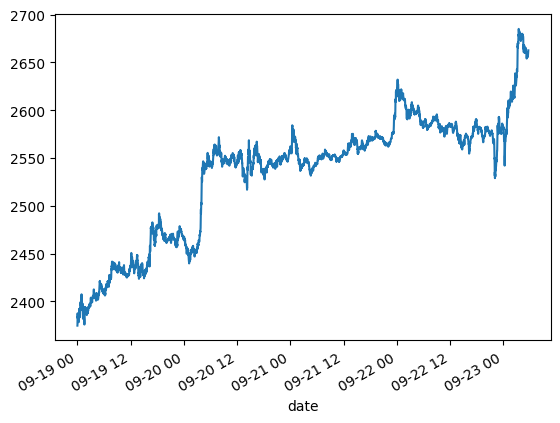

In [25]:
df_btc['close'].plot(kind='line')

In [26]:
df_btc.rename(columns={'close':'Close','open':'Open', 'high':'High', 'low':'Low','volume':'Volume'}, inplace=True)

## Crear Backtest

In [27]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 200)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(df_btc, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

/opt/conda/envs/pypro/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/envs/pypro/lib/python3.10/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

/opt/conda/envs/pypro/lib/python3.10/site-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/opt/conda/envs/pypro/lib/python3.10/site-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/opt/conda/envs/pypro/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  form

GridPlot(id='p1325', ...)

In [28]:
print(stats)

Start                     2024-09-19 00:00:00
End                       2024-09-23 05:37:00
Duration                      4 days 05:37:00
Exposure Time [%]                    93.47181
Equity Final [$]                  8716.055031
Equity Peak [$]                  10054.874875
Return [%]                          -12.83945
Buy & Hold Return [%]               12.126076
Return (Ann.) [%]                  -99.743108
Volatility (Ann.) [%]                0.107719
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -15.938743
Avg. Drawdown [%]                   -3.352517
Max. Drawdown Duration        3 days 21:47:00
Avg. Drawdown Duration        0 days 19:03:00
# Trades                                   74
Win Rate [%]                        10.810811
Best Trade [%]                       3.837609
Worst Trade [%]                     -1.357722
Avg. Trade [%]                    

In [36]:
help(SMA)

Help on function SMA in module backtesting.test:

SMA(arr: pandas.core.series.Series, n: int) -> pandas.core.series.Series
    Returns `n`-period simple moving average of array `arr`.

